## Simulation of measured TiO2 111 peak

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
#Add the directory of the module to the path.
#sys.path.append('/media/sf_OneDrive_-_Johns_Hopkins/pyMACS/pyMACS')
from pyMACS.virtualMACS import VirtualMACS
import mcstasscript as ms


macs = VirtualMACS('TiO2_111',cifName='TiO2.cif')
macs.sample.formula_weight=79.87
macs.sample.sample_widx=5e-3
macs.sample.sample_widz=5e-3
macs.sample.sample_widy=5e-3
macs.sample.cif2lau()
#Sample was oriented in the (HHL) plane, like so
macs.sample.orient_u=[1,1,0]
macs.sample.orient_v=[0,0,1]
macs.sample.project_sample_realspace()

#Assign simulation counts
macs.n_mono=1e7
macs.n_sample=1e6


#########################
Old simulations found in /mnt/c/Users/tjh/OneDrive - NIST/pyMACS/Paper Calculations/TiO2 110 Bragg Peak/TiO2_111/Kidney_simulations/
 
Successfully combined old simulations into /mnt/c/Users/tjh/OneDrive - NIST/pyMACS/Paper Calculations/TiO2 110 Bragg Peak/TiO2_111/Kidney_simulations/TiO2_111_total.csv

Data matrix instantiated and ready to use.
#########################
 
Conversion of CIF to crystallographical LAU file successful. 


In [2]:
scattering_def = ms.McStas_instr("scattering_definition",checks=False)
inc_scatter = scattering_def.add_component("inc_scatter","Incoherent_process")
inc_scatter.sigma=macs.sample.sigma_inc
inc_scatter.unit_cell_volume = macs.sample.cell_vol
inc_scatter.packing_factor = 1
inc_scatter.set_AT([0,0,0])

#Single crystal process. 
crystal_scatter = scattering_def.add_component("crystal_scatter","Single_crystal_process")
crystal_scatter.delta_d_d=0.005
crystal_scatter.mosaic = 30.0
#Projections of lattice vectors onto lab frame is handled by the previous helper process.
labproj = macs.sample.labframe_mat
crystal_scatter.ax = labproj[0,0]
crystal_scatter.ay = labproj[0,1]
crystal_scatter.az = labproj[0,2]
crystal_scatter.bx = labproj[1,0]
crystal_scatter.by = labproj[1,1]
crystal_scatter.bz = labproj[1,2]
crystal_scatter.cx = labproj[2,0]
crystal_scatter.cy = labproj[2,1]
crystal_scatter.cz = labproj[2,2]
crystal_scatter.reflections='\"'+"TiO2.lau"+'\"'
crystal_scatter.barns=1
crystal_scatter.packing_factor=1
crystal_scatter.powder=0
crystal_scatter.PG=0
crystal_scatter.interact_fraction=0.8
crystal_scatter.set_AT([0,0,0])
crystal_scatter.set_ROTATED([0,0,0])

scattering = scattering_def.add_component("TiO2","Union_make_material")
scattering.process_string='"crystal_scatter,inc_scatter"'
scattering.my_absorption=macs.sample.rho_abs
scattering.set_AT([0,0,0])

#Now, this pseudo-instrument will be saved as the scattering definition of the sample. 
macs.sample.scattering_def = scattering_def

#Make a second object for the geometry. This particular case replicates the validation experiment for this package.
geo_def = ms.McStas_instr("geometry_definition",checks=False)

sample_cube=geo_def.add_component("sample_cube","Union_box")
sample_cube.xwidth=1.0*macs.sample.sample_widx
sample_cube.yheight=1.0*macs.sample.sample_widy
sample_cube.zdepth=1.0*macs.sample.sample_widz
sample_cube.priority=100
sample_cube.material_string='\"TiO2\"'
sample_cube.number_of_activations="number_of_activations_sample" #Do not change. 
sample_cube.set_AT([0,0,0],RELATIVE='crystal_assembly')
sample_cube.set_ROTATED([0,0,0],RELATIVE='crystal_assembly')
'''
sample_cube_mask1 = geo_def.add_component("sample_cube_mask1","Union_box") #It's easier to rotate a mask rather than the sample itself.
sample_cube_mask1.xwidth=macs.sample.sample_widx
sample_cube_mask1.yheight=macs.sample.sample_widy
sample_cube_mask1.zdepth=macs.sample.sample_widz
sample_cube_mask1.priority=0
sample_cube_mask1.material_string='"Mask"'
sample_cube_mask1.number_of_activations="number_of_activations_sample"
sample_cube_mask1.mask_string='"sample_cube"'
sample_cube_mask1.mask_setting='"All"'
sample_cube_mask1.visualize=0
sample_cube_mask1.set_AT([0,0,0],RELATIVE="crystal_assembly")
sample_cube_mask1.set_ROTATED([0,0,0], RELATIVE="crystal_assembly")
'''
sample_plate = geo_def.add_component("sample_plate","Union_cylinder")
sample_plate.radius=0.006
sample_plate.yheight=0.002
sample_plate.priority=40
sample_plate.material_string='"Al"'
plate_distance = macs.sample.sample_widy+0.002
sample_plate.set_AT([0,plate_distance,0],RELATIVE="target")
sample_plate.set_ROTATED([0,0,0],RELATIVE="target")

sample_plate_rod = geo_def.add_component("sample_plate_rod","Union_cylinder")
sample_plate_rod.radius=0.00125
sample_plate_rod.yheight=0.0633
sample_plate_rod.priority=41
sample_plate_rod.material_string='"Al"'
sample_plate_rod.set_AT([0,plate_distance+0.001+0.031,0], RELATIVE="target")
sample_plate_rod.set_ROTATED([0,0,0],RELATIVE="target")

sample_base = geo_def.add_component("sample_base","Union_cylinder")
sample_base.radius=0.0065
sample_base.yheight=0.013
sample_base.priority=42
sample_base.material_string='\"Al\"'
sample_base.set_AT([0,0.0628,0],RELATIVE="target")
sample_base.set_ROTATED([0,0,0],RELATIVE="target")

sample_base_gap = geo_def.add_component("sample_base_gap","Union_cylinder")
sample_base_gap.radius=0.004
sample_base_gap.yheight=0.009
sample_base_gap.priority=43
sample_base_gap.material_string='"Vacuum"'
sample_base_gap.set_AT([0,0.0668,0], RELATIVE="target")
sample_base_gap.set_ROTATED([0,0,0],RELATIVE="target")

macs.sample.geometry_def = geo_def

macs.useOld=True

useOld=True
if useOld==True:
    macs.useOld=True
    #macs.prepare_old_expt_directory()
    #macs.clean_expt_directory()
else:
    macs.data.data_matrix=False
    #macs.clean_expt_directory()
    macs.prepare_expt_directory()
    macs.compileMonochromator()
macs.prepare_expt_directory()

macs.edit_instr_file()
macs.compileInstr()


/mnt/c/Users/tjh/OneDrive - NIST/GitHub/pyMACS/pyMACS
/mnt/c/Users/tjh/OneDrive - NIST/pyMACS/Paper Calculations/TiO2 110 Bragg Peak
#################

Starting compilation of sample kidney geometry.

Compilation of sample kidney geometry successful.

#################



1

In [3]:
scan_dir = 'TiO2_110 ng0 files/'
#macs.simulate_ng0dir(scan_dir,n_threads=8)

In [4]:
#Save the scan in one large csv file 
#macs.data.combine_csv_scans(preserve_old=True,flagstr='fpx')
macs.data.load_data_matrix_from_csv('fpx_dataMatrix.csv')
#macs.data.combine_all_csv()

1

In [5]:
import matplotlib.pyplot as plt
import glob
macs.data.project_data_QE(PTAI=True,which_data='mcstas')


ng0_files = glob.glob(scan_dir+'*.ng0')
for f in ng0_files:
    macs.data.import_ng0_to_matrix(f)
macs.data.project_data_QE(PTAI=True,which_data='macs')

1

Qnet = [-1.93164  0.       0.     ]
Qnet = [-1.93164  0.       0.     ]


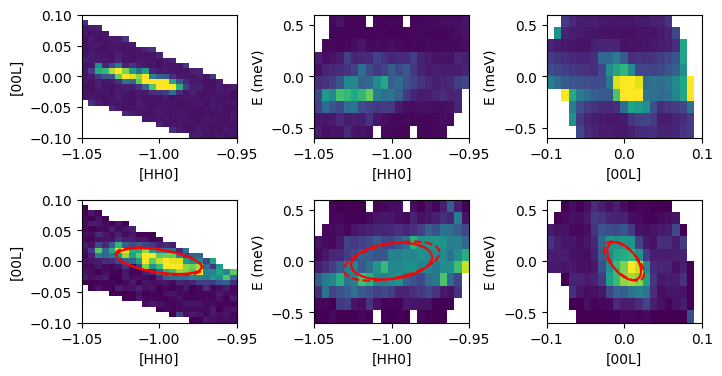

In [6]:
import pyMACS
cmap="viridis"
fig,ax = plt.subplots(2,3,figsize=(8,4))

fig.subplots_adjust(hspace=0.5,wspace=0.5)
U,V,I,Err = macs.data.take_slice([-1.05,-0.95,24],[-0.1,0.1,24],[-0.07,0.07],which_data='macs')
ax[0,0].pcolormesh(U,V,I.T,cmap=cmap,vmin=0,vmax=3e-4)
ax[0,0].set_xlabel('[HH0]')
ax[0,0].set_ylabel('[00L]')
#ax[0,0].set_title("TiO2, MACS")

U,V,I,Err = macs.data.take_slice([-1.05,-0.95,22],[-0.03,0.03],[-0.6,0.6,11],which_data='macs')
ax[0,1].pcolormesh(U,V,I.T,cmap=cmap,vmin=0,vmax=1e-4)
ax[0,1].set_xlabel('[HH0]')
ax[0,1].set_ylabel('E (meV)')
#ax[0,1].set_title("TiO2, MACS")

U,V,I,Err = macs.data.take_slice([-1.05,-0.95],[-0.1,0.1,22],[-0.6,0.6,11],which_data='macs')

ax[0,2].pcolormesh(U,V,I.T,cmap=cmap,vmin=0,vmax=2e-5)
ax[0,2].set_xlabel('[00L]')
ax[0,2].set_ylabel('E (meV)')
#ax[0,2].set_title("TiO2 , MACS")


U,V,I,Err = macs.data.take_slice([-1.05,-0.95,24],[-0.1,0.1,24],[-0.07,0.07],which_data='mcstas')
ax[1,0].pcolormesh(U,V,I.T,cmap=cmap,vmin=0,vmax=7e1)
ax[1,0].set_xlabel('[HH0]')
ax[1,0].set_ylabel('[00L]')
#ax[1,0].set_title("TiO2, McStas")

U,V,I,Err = macs.data.take_slice([-1.05,-0.95,22],[-0.03,0.03],[-0.6,0.6,11],which_data='mcstas')
#fig,ax = plt.subplots(1,2,figsize=(5,3),sharex=True,sharey=True)
ax[1,1].pcolormesh(U,V,I.T,cmap=cmap,vmin=0,vmax=4e1)
ax[1,1].set_xlabel('[HH0]')
ax[1,1].set_ylabel('E (meV)')
#ax[1,1].set_title("TiO2, MACS")

U,V,I,Err = macs.data.take_slice([-1.05,-0.95],[-0.1,0.1,22],[-0.6,0.6,11],which_data='mcstas')

ax[1,2].pcolormesh(U,V,I.T,cmap=cmap)
ax[1,2].set_xlabel('[00L]')
ax[1,2].set_ylabel('E (meV)')
#ax[1,2].set_title("TiO2 , MACS")
#fig.savefig("TiO2_A3scan_test.pdf",bbox_inches="tight")

#Overplot the tabulated resolution ellipsoid
qvec = np.array([-1.0,-1.0,0.0])

qxpt,qzpt = pyMACS.scripting.hkl_to_labframe(qvec[0],qvec[1],0,macs)
M_load,M_diag_load,Q_hkw_load = pyMACS.scripting.macs_resfunc(qvec[0],qvec[1],0.0,0.0,5.0,macsobj=macs,
                                             gen_plot=False,verbose=False,calc_mode="load_cov")

ellips, proj_ellips = pyMACS.scripting.res_ellipses(M_load,Qmean=np.array([-1.0,0,0]),macsobj=macs)

#Small deviations in Q to account for misalignment in experiment
ax[1,0].plot(ellips[0][0,:],ellips[0][1,:],'r-')
ax[1,1].plot(ellips[1][0,:],ellips[1][1,:],'r-')
ax[1,2].plot(ellips[2][0,:],ellips[2][1,:],'r-')
ax[1,0].plot(proj_ellips[0][0,:],proj_ellips[0][1,:],'r--')
ax[1,1].plot(proj_ellips[1][0,:],proj_ellips[1][1,:],'r--')
ax[1,2].plot(proj_ellips[2][0,:],proj_ellips[2][1,:],'r--')